# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt


# Loading all the libraries



## Load data

In [3]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
print(calls)
print()
print(internet)
print()
print(messages)
print()
print(plans)
print()
print(users)
# Load the data files into different DataFrames



              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


#The plans datafram is fairly basic, containing only two rows.  The first row includes the information for the surf plan (i.e. the amount of messages included, the mb per month, minutes include, cost per month, cost for excess MB per month and cost for excess calls and messages per month).  The 2nd row does the same thing for the ultimate plan.

In [5]:
# Print a sample of data for plans
print(plans.head(5))


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


#No missing data or inappropriate data types in this dataframe, the decimals are floats and the whole numbers are integers.  The strings are objects.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

#No issues with this workbook.

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Print a sample of data for users
print(users.sample(n=10))


     user_id first_name  last_name  age  \
315     1315       Mora  Schroeder   45   
372     1372     Patria        Kim   26   
450     1450      Errol    Marquez   67   
56      1056      Denis   Chandler   33   
310     1310    Vincent        Fry   73   
401     1401   Charmain     Bryant   67   
494     1494    Preston      Downs   70   
226     1226     Denver    Harrell   64   
62      1062   Kristeen       Head   41   
91      1091     Taylor     Oliver   38   

                                          city    reg_date      plan  \
315                       Raleigh-Cary, NC MSA  2018-04-26      surf   
372  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-08      surf   
450                        Bakersfield, CA MSA  2018-06-16  ultimate   
56                    Cincinnati, OH-KY-IN MSA  2018-03-01      surf   
310    Portland-Vancouver-Hillsboro, OR-WA MSA  2018-11-29      surf   
401                           Richmond, VA MSA  2018-08-24  ultimate   
494  New York-Newark-J

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
duplicates = users.duplicated()
print(duplicates.sum())

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
print(users.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enrich Data

In [10]:
users['churn_date'] = users['churn_date'].replace(' ', pd.NA)
print(users.info())
print(users.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
     user_id first_name last_name  age  \
354     1354     Leonel      Dyer   41   
107     1107       Lane      Cash   61   
304     1304   Dominque      Cole   69   
47      1047        Yuk    French   22   
356     1356        Hae      Ryan   46   
118     1118      Deane   Ramirez   28   
323     1323    Pamelia    Atkins   42   
431  

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
print(calls.info())
print(calls.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [12]:
# Print a sample of data for calls
print(calls.sample(10))
print(calls.head(10)) #printing head 10 to view the first 10 rows and compare to the first 10 rows after i round


              id  user_id   call_date  duration
5447    1026_258     1026  2018-08-04      0.00
86400    1320_69     1320  2018-12-09     14.58
24537   1094_465     1094  2018-11-01      0.00
134173  1488_309     1488  2018-06-08      7.55
82488   1299_146     1299  2018-07-31      8.25
114953   1403_27     1403  2018-03-22     14.97
50800   1183_144     1183  2018-11-02      0.06
63756   1231_470     1231  2018-07-08      0.00
7550    1036_142     1036  2018-11-10      0.00
17541    1067_59     1067  2018-12-30      8.17
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

In [13]:
duplicates_calls = calls.duplicated()
print(duplicates_calls.sum())

calls['call_date'] = pd.to_datetime(calls['call_date'])

0


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls['duration_round'] = np.ceil(calls['duration']).astype(int)
calls['month'] = calls['call_date'].dt.month
print(calls.head(10))
print(calls)

         id  user_id  call_date  duration  duration_round  month
0   1000_93     1000 2018-12-27      8.52               9     12
1  1000_145     1000 2018-12-27     13.66              14     12
2  1000_247     1000 2018-12-27     14.48              15     12
3  1000_309     1000 2018-12-28      5.76               6     12
4  1000_380     1000 2018-12-30      4.22               5     12
5  1000_388     1000 2018-12-31      2.20               3     12
6  1000_510     1000 2018-12-27      5.75               6     12
7  1000_521     1000 2018-12-28     14.18              15     12
8  1000_530     1000 2018-12-28      5.77               6     12
9  1000_544     1000 2018-12-26      4.40               5     12
              id  user_id  call_date  duration  duration_round  month
0        1000_93     1000 2018-12-27      8.52               9     12
1       1000_145     1000 2018-12-27     13.66              14     12
2       1000_247     1000 2018-12-27     14.48              15     12
3    

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
print(messages.info())
print()
print(messages.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [16]:
# Print a sample of data for messages
print(messages.sample(10))
print()
print(messages.head(10))

             id  user_id message_date
75656    1492_2     1492   2018-12-18
68452   1442_24     1442   2018-12-31
56495  1357_106     1357   2018-07-28
52213  1336_164     1336   2018-09-07
12385  1081_136     1081   2018-12-31
40707  1261_367     1261   2018-09-07
827    1007_129     1007   2018-10-23
50004  1328_962     1328   2018-06-18
41303  1264_503     1264   2018-10-20
34058  1214_152     1214   2018-03-09

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

In [17]:
duplicates_messages = messages.duplicated()
print(duplicates_messages.sum())

messages['message_date'] = pd.to_datetime(messages['message_date'])

0


### Enrich data

In [18]:
messages['month'] = messages['message_date'].dt.month
print(messages.head(10))
nan_count = messages['month'].isna().sum()
print(nan_count)

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12
5  1000_346     1000   2018-12-29     12
6  1000_386     1000   2018-12-30     12
7  1000_413     1000   2018-12-31     12
8  1000_502     1000   2018-12-27     12
9  1000_525     1000   2018-12-28     12
0


## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
print(internet.info())
print()
print(internet.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [20]:
# Print a sample of data for the internet traffic
print(internet.sample(10))
print()
print(internet.head(10))


             id  user_id session_date  mb_used
39555  1178_147     1178   2018-12-26   126.52
46896  1209_124     1209   2018-12-29  1288.66
26245  1122_200     1122   2018-08-09   408.48
25994   1121_87     1121   2018-12-08   131.21
91504   1422_35     1422   2018-12-26     0.00
98377  1465_283     1465   2018-08-26     0.00
21859   1100_63     1100   2018-09-10   214.77
30184  1138_420     1138   2018-05-10   522.43
98868    1467_5     1467   2018-05-19   286.07
51110   1231_39     1231   2018-11-24   114.99

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [21]:
duplicates_internet = internet.duplicated()
print(duplicates_internet.sum())

internet['session_date'] = pd.to_datetime(internet['session_date'])

internet['mb_used'] = internet['mb_used'].replace(0, np.nan)
print(internet.head(10))

0
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31      NaN
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
internet['mb_used'] = internet['mb_used'].replace(0, np.nan)
internet['month'] = internet['session_date'].dt.month
internet['gb'] = np.ceil(internet['mb_used'] / 1024)   #np.ceil(calls['duration']).astype(int)
print(internet.head(10))
print(internet.sample(10))

         id  user_id session_date  mb_used  month   gb
0   1000_13     1000   2018-12-29    89.86     12  1.0
1  1000_204     1000   2018-12-31      NaN     12  NaN
2  1000_379     1000   2018-12-28   660.40     12  1.0
3  1000_413     1000   2018-12-26   270.99     12  1.0
4  1000_442     1000   2018-12-27   880.22     12  1.0
5    1001_0     1001   2018-08-24   284.68      8  1.0
6    1001_3     1001   2018-12-09   656.04     12  1.0
7    1001_4     1001   2018-11-04    16.97     11  1.0
8   1001_10     1001   2018-11-27   135.18     11  1.0
9   1001_15     1001   2018-12-13   761.92     12  1.0
             id  user_id session_date  mb_used  month   gb
99967   1474_51     1474   2018-09-02      NaN      9  NaN
52295  1236_140     1236   2018-09-04   403.64      9  1.0
60514   1274_52     1274   2018-12-20    59.99     12  1.0
38951  1174_214     1174   2018-11-18   545.10     11  1.0
97349  1458_442     1458   2018-09-01   645.98      9  1.0
25559   1120_51     1120   2018-12-27   3

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
#The surf plan is an automatic monthly charge of $20, with that you get 500 minutes, 50 texts and 15 gb of data.  For every 1 minute you go over 500 you get charged 3 cents.  For every text message over 50 you get charged 3 cents.  For every GB over 15 you get charged $10.
#The ultimate plan is an automatic monthly charge of $70, with that you get 3000 minutes, 1000 texts and 30 gb of data.  For every 1 minute you go over 3000 you get charged 1 cent.  For every text message over 1000 you get charged 1 cent.  For every GB over 30 you get charged $7.
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
monthly_calls = calls.groupby(['user_id', 'month']).size().reset_index(name='monthly_calls')
print(monthly_calls)


      user_id  month  monthly_calls
0        1000     12             16
1        1001      8             27
2        1001      9             49
3        1001     10             65
4        1001     11             64
...       ...    ...            ...
2253     1498     12             39
2254     1499      9             41
2255     1499     10             53
2256     1499     11             45
2257     1499     12             65

[2258 rows x 3 columns]


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
monthly_minutes = calls.groupby(['user_id', 'month'])['duration_round'].sum().reset_index()
monthly_minutes.rename(columns={'duration_round': 'monthly_minutes'}, inplace=True)
print(monthly_minutes)


      user_id  month  monthly_minutes
0        1000     12              124
1        1001      8              182
2        1001      9              315
3        1001     10              393
4        1001     11              426
...       ...    ...              ...
2253     1498     12              339
2254     1499      9              346
2255     1499     10              385
2256     1499     11              308
2257     1499     12              496

[2258 rows x 3 columns]


In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_texts = messages.groupby(['user_id', 'month']).size().reset_index(name='monthly_texts')
print(monthly_texts)



      user_id  month  monthly_texts
0        1000     12             11
1        1001      8             30
2        1001      9             44
3        1001     10             53
4        1001     11             36
...       ...    ...            ...
1801     1496      9             21
1802     1496     10             18
1803     1496     11             13
1804     1496     12             11
1805     1497     12             50

[1806 rows x 3 columns]


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
monthly_gbs = internet.groupby(['user_id', 'month'])['gb'].sum().reset_index()
monthly_gbs.rename(columns={'gb': 'monthly_gbs'}, inplace=True)
print(monthly_gbs)


      user_id  month  monthly_gbs
0        1000     12          4.0
1        1001      8         21.0
2        1001      9         41.0
3        1001     10         50.0
4        1001     11         49.0
...       ...    ...          ...
2272     1498     12         56.0
2273     1499      9         37.0
2274     1499     10         52.0
2275     1499     11         43.0
2276     1499     12         58.0

[2277 rows x 3 columns]


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = pd.merge(monthly_calls, monthly_minutes, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, monthly_texts, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, monthly_gbs, on=['user_id', 'month'], how='outer')
merged_data.fillna(0,inplace=True)
print(merged_data)

      user_id  month  monthly_calls  monthly_minutes  monthly_texts  \
0        1000     12           16.0            124.0           11.0   
1        1001      8           27.0            182.0           30.0   
2        1001      9           49.0            315.0           44.0   
3        1001     10           65.0            393.0           53.0   
4        1001     11           64.0            426.0           36.0   
...       ...    ...            ...              ...            ...   
2288     1349     12            0.0              0.0           61.0   
2289     1361      5            0.0              0.0            2.0   
2290     1482     10            0.0              0.0            2.0   
2291     1108     12            0.0              0.0            0.0   
2292     1311      6            0.0              0.0            0.0   

      monthly_gbs  
0             4.0  
1            21.0  
2            41.0  
3            50.0  
4            49.0  
...           ...  
2288   

In [29]:
# Add the plan information
merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on=['user_id'], how='outer')
merged_data.rename(columns={'plan': 'plan_name'}, inplace=True)
merged_data = pd.merge(merged_data, plans, on='plan_name', how='left')
merged_data.fillna(0,inplace=True)
print(merged_data)

      user_id  month  monthly_calls  monthly_minutes  monthly_texts  \
0        1000   12.0           16.0            124.0           11.0   
1        1001    8.0           27.0            182.0           30.0   
2        1001    9.0           49.0            315.0           44.0   
3        1001   10.0           65.0            393.0           53.0   
4        1001   11.0           64.0            426.0           36.0   
...       ...    ...            ...              ...            ...   
2298     1307    0.0            0.0              0.0            0.0   
2299     1319    0.0            0.0              0.0            0.0   
2300     1378    0.0            0.0              0.0            0.0   
2301     1463    0.0            0.0              0.0            0.0   
2302     1473    0.0            0.0              0.0            0.0   

      monthly_gbs plan_name  messages_included  mb_per_month_included  \
0             4.0  ultimate               1000                  30720   
1

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [30]:
# Calculate the monthly revenue for each user
merged_data['extra_minutes'] = (merged_data['monthly_minutes'] - merged_data['minutes_included']).clip(lower=0)
merged_data['extra_texts'] = (merged_data['monthly_texts'] - merged_data['messages_included']).clip(lower=0)
merged_data['extra_gbs'] = (merged_data['monthly_gbs'] - (merged_data['mb_per_month_included'] / 1024)).clip(lower=0)

merged_data['extra_minutes_charge'] = (merged_data['extra_minutes'] * merged_data['usd_per_minute'])
merged_data['extra_texts_charge'] = (merged_data['extra_texts'] * merged_data['usd_per_message'])
merged_data['extra_data_charge'] = (merged_data['extra_gbs'] * merged_data['usd_per_gb'])

merged_data['monthly_revenue'] = (merged_data['usd_monthly_pay'] + merged_data['extra_minutes_charge'] + merged_data['extra_texts_charge'] + merged_data['extra_data_charge'])

print(merged_data[['user_id', 'month', 'monthly_revenue']])

      user_id  month  monthly_revenue
0        1000   12.0            70.00
1        1001    8.0            80.00
2        1001    9.0           280.00
3        1001   10.0           370.09
4        1001   11.0           360.00
...       ...    ...              ...
2298     1307    0.0            20.00
2299     1319    0.0            20.00
2300     1378    0.0            20.00
2301     1463    0.0            70.00
2302     1473    0.0            20.00

[2303 rows x 3 columns]


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

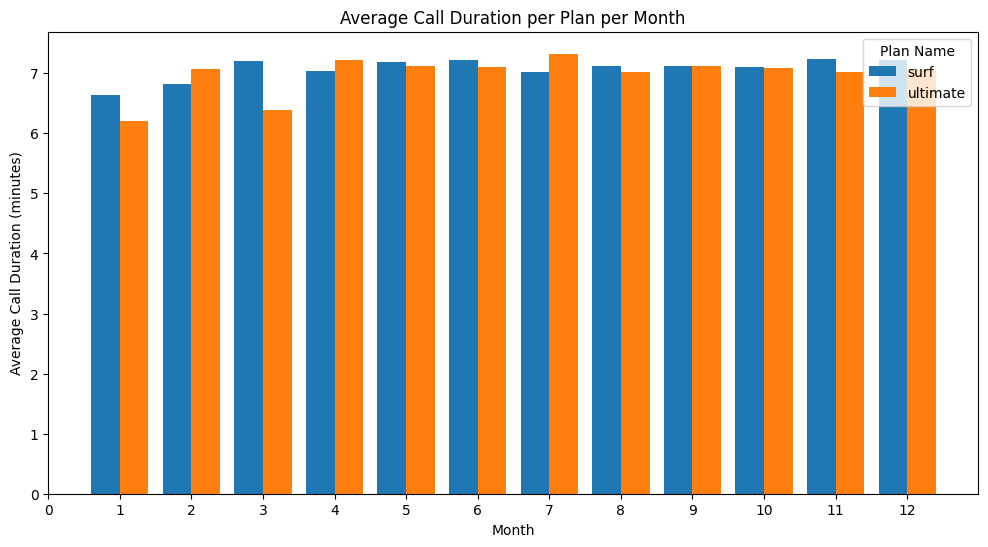

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
merged_data['average_call_duration'] = merged_data['monthly_minutes'] / merged_data['monthly_calls']
average_duration_per_plan_month = merged_data.groupby(['plan_name', 'month'])['average_call_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
bar_width = 0.4
for i, plan in enumerate(average_duration_per_plan_month['plan_name'].unique()):
    subset = average_duration_per_plan_month[average_duration_per_plan_month['plan_name'] == plan]
   
    plt.bar(subset['month'] + (i - 0.5) * bar_width, subset['average_call_duration'], width=bar_width, label=plan)
    alpha_value = 0.6
    plt.xlabel('Month')
    plt.ylabel("Average Call Duration (minutes)")
    plt.title('Average Call Duration per Plan per Month')
    plt.legend(title='Plan Name')
    plt.xticks(ticks=average_duration_per_plan_month['month'].unique())
    plt.show

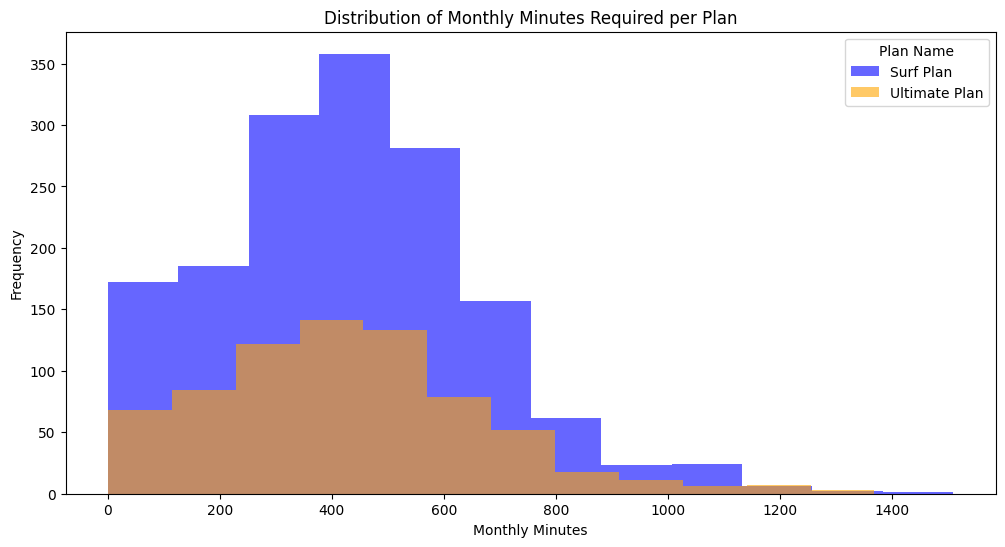

In [31]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']['monthly_minutes']
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_minutes']

plt.figure(figsize=(12, 6))
plt.hist(surf_data, bins=12, alpha=0.6, label='Surf Plan', color='blue')
plt.hist(ultimate_data, bins=12, alpha=0.6, label='Ultimate Plan', color='orange')

plt.xlabel("Monthly Minutes")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Minutes Required per Plan")
plt.legend(title="Plan Name")
plt.show()



#Looking at this data it is obvious there are way more monthly users who use the surf plan.  Also judging from the data the monthly minutes used distribution is fairly similar across the plans.  If they have similar minutes that means the surf plan will be generating a lot of revenue from the extra minutes the plan users use each month.

#

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [32]:
# Calculate the mean and the variance of the monthly call duration
mean_duration = merged_data.groupby('plan_name')['monthly_minutes'].mean()
variance_duration = merged_data.groupby('plan_name')['monthly_minutes'].var()

print("Mean Monthly Call Duration (minutes):")
print(mean_duration)
print("\nVariance of Monthly Call Duration (minutes):")
print(variance_duration)



Mean Monthly Call Duration (minutes):
plan_name
surf        427.120329
ultimate    428.071823
Name: monthly_minutes, dtype: float64

Variance of Monthly Call Duration (minutes):
plan_name
surf        55455.577400
ultimate    58543.878652
Name: monthly_minutes, dtype: float64


#Call duration and variance is very similar between the two plans.  For ultimate the mean is slightly higher and the variables are slightly more spread out.

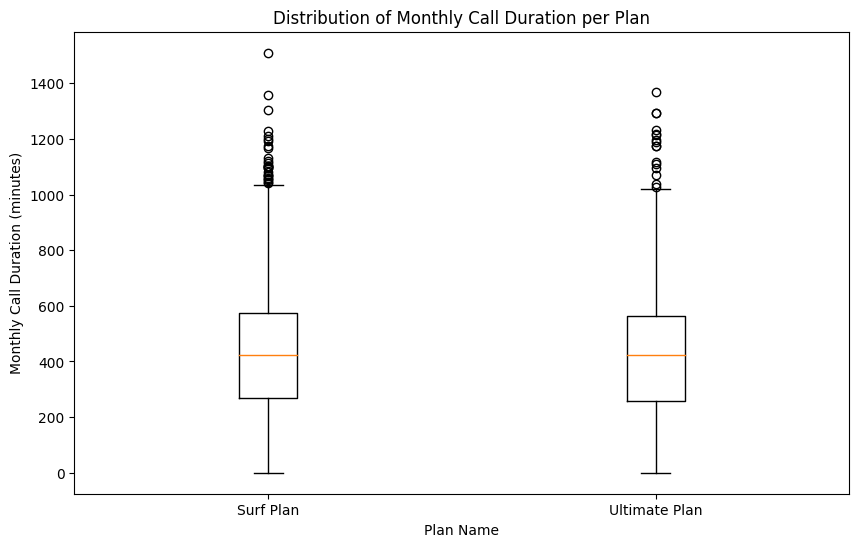

In [31]:
# Plot a boxplot to visualize the distribution of the monthly call duration

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(
    [merged_data[merged_data['plan_name'] == 'surf']['monthly_minutes'],
     merged_data[merged_data['plan_name'] == 'ultimate']['monthly_minutes']],
    labels=['Surf Plan', 'Ultimate Plan']
)

plt.xlabel("Plan Name")
plt.ylabel("Monthly Call Duration (minutes)")
plt.title("Distribution of Monthly Call Duration per Plan")
plt.show()


#Just like before average is very similar but ultimate plan has more a wider variance even though it appears the surf plan has larger outliers.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

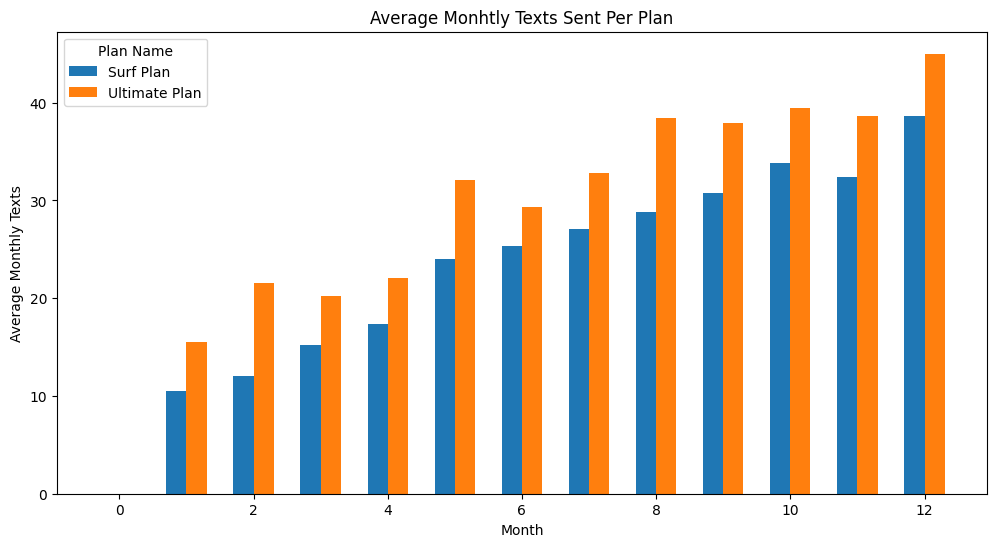

In [32]:
# Compare the number of messages users of each plan tend to send each month
average_texts_per_user_per_plan = merged_data.groupby(['plan_name', 'month'])['monthly_texts'].mean().reset_index()

plt.figure(figsize=(12,6))
surf_data = average_texts_per_user_per_plan[average_texts_per_user_per_plan['plan_name'] == 'surf']
plt.bar(surf_data['month'] - 0.15, surf_data['monthly_texts'], width=0.3, label="Surf Plan")

ultimate_data = average_texts_per_user_per_plan[average_texts_per_user_per_plan['plan_name'] == 'ultimate']
plt.bar(surf_data['month'] + 0.15, ultimate_data['monthly_texts'], width=0.3, label="Ultimate Plan")

plt.xlabel("Month")
plt.ylabel("Average Monthly Texts")
plt.title("Average Monhtly Texts Sent Per Plan")
plt.legend(title="Plan Name")
plt.show()

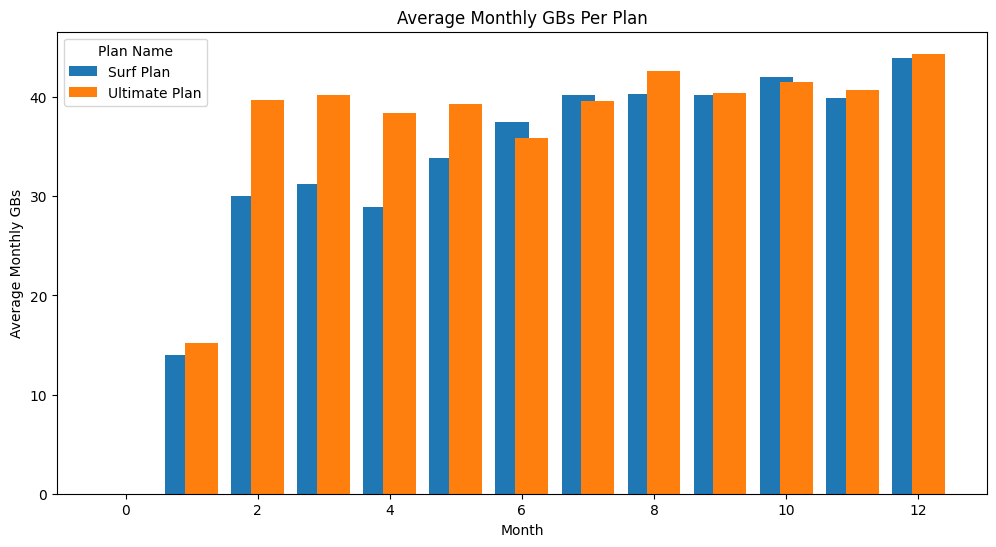

In [33]:
# Compare the amount of internet traffic consumed by users per plan
average_gbs_per_user_per_plan = merged_data.groupby(['plan_name', 'month'])['monthly_gbs'].mean().reset_index()

plt.figure(figsize=(12,6))
surf_data = average_gbs_per_user_per_plan[average_gbs_per_user_per_plan['plan_name'] == 'surf']
plt.bar(surf_data['month'] - 0.15, surf_data['monthly_gbs'], width=0.5, label="Surf Plan")

ultimate_data = average_gbs_per_user_per_plan[average_gbs_per_user_per_plan['plan_name'] == 'ultimate']
plt.bar(surf_data['month'] + 0.15, ultimate_data['monthly_gbs'], width=0.5, label="Ultimate Plan")

plt.xlabel("Month")
plt.ylabel("Average Monthly GBs")
plt.title("Average Monthly GBs Per Plan")
plt.legend(title="Plan Name")
plt.show()


#Monthly users on the ultimate plan tend to send about 5 to 10 more messages per month than users on the surf plan.  An interesting point about the data is the average amount of texts sent per user per month tends to increase with each month.  Increasing from about 10 in January to about 40 in December for the Surf Plan.  Increasing from about 15 to almost 50 per month for the ultimate plan.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

#Users in the ultimate plan used more data than users on the surf plan 8 out of the 12 months.  It is fairly surprising the surf plan had any months where users were using more data than ultimate plan people.  This will show up later that a lot of revenue will be getting generated from the surf plan users going over their data limits and getting charged per GB.

#The first 5 months there was a decent amount of difference between data usage between the plans but the last 7 months the usage was fairly similar.  Just like with messages users were using far more data at the end of the year than they were at the beginning.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

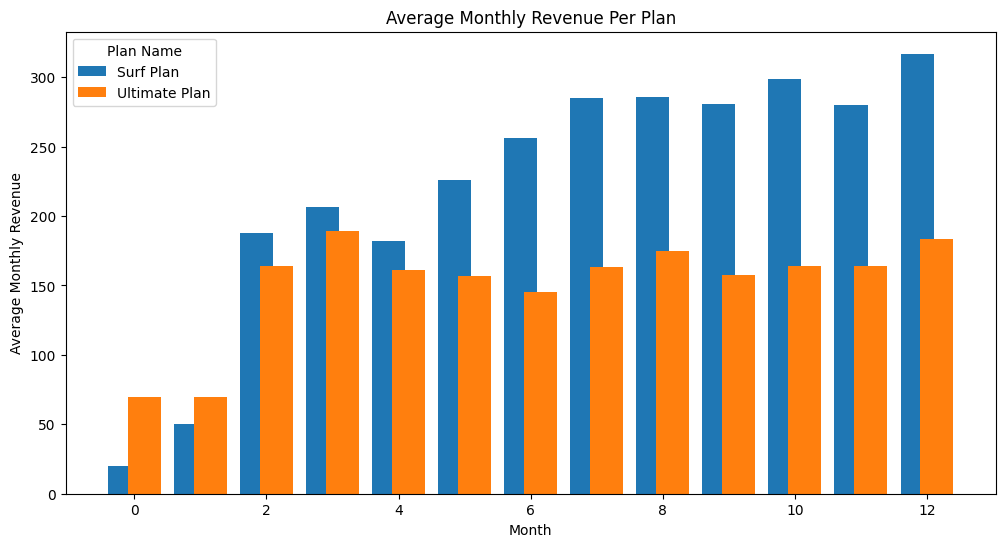

In [34]:
average_revenue_per_user_per_plan = merged_data.groupby(['plan_name', 'month'])['monthly_revenue'].mean().reset_index()

plt.figure(figsize=(12,6))
surf_data = average_revenue_per_user_per_plan[average_revenue_per_user_per_plan['plan_name'] == 'surf']
plt.bar(surf_data['month'] - 0.15, surf_data['monthly_revenue'], width=0.5, label="Surf Plan")

ultimate_data = average_revenue_per_user_per_plan[average_revenue_per_user_per_plan['plan_name'] == 'ultimate']
plt.bar(surf_data['month'] + 0.15, ultimate_data['monthly_revenue'], width=0.5, label="Ultimate Plan")

plt.xlabel("Month")
plt.ylabel("Average Monthly Revenue")
plt.title("Average Monthly Revenue Per Plan")
plt.legend(title="Plan Name")
plt.show()

#In the first two months the ultimate plan was generating more revenue than the surf plan but after that the surf plan exceeded the ultimate plan.  In the last 8 months of the year the surf plan drastically outperformed the ultimate plan when it came to revenue generation.  The average surf plan user generated more than $100 in revenue than the average ultimate plan member in 7 of the last 8 months of the year.  The data above helps explain this as surf plan users were using just as much texts and internet data as the ultimate plan members were the last 8 months of the year while having way lower limits.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [36]:
# Test the hypotheses
from scipy.stats import ttest_ind

ultimate_revenue = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue']
surf_revenue = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue']
t_stat, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
alpha = 0.05

print('T-test for revenue differences between Ultimate and Surf plans:')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print()
print(f"H0: x1 = x2")
print(f"H1: x1 != x2")
print()
if p_value < alpha:
    print("Reject the null hypothesis (H0) - there is a significant difference in average revenue between the two plans.")
else:
    print("Fail to reject the null hypothesis, there is no statistical difference in revenue between the two plans.")



T-test for revenue differences between Ultimate and Surf plans:
T-statistic: -21.926511855969686
P-value: 9.57259390199446e-97

H0: x1 = x2
H1: x1 != x2

Reject the null hypothesis (H0) - there is a significant difference in average revenue between the two plans.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [37]:
# Test the hypotheses
merged_data = pd.merge(merged_data, users[['user_id', 'city']], on=['user_id'], how='outer')

ny_nj_revenue = merged_data[merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_revenue = merged_data[merged_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('T-test for revenue differences between NY-NJ Region and Other Regions:')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print()
print(f"H0: x1 = x2")
print(f"H1: x1 != x2")
print()
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in average revenue between the two regions.")
else:
    print("Fail to reject the null hypothesis, there is no statistical difference in revenue between the two regions.")



T-test for revenue differences between NY-NJ Region and Other Regions:
T-statistic: 2.8972963084302625
P-value: 0.003912047986573631

H0: x1 = x2
H1: x1 != x2

Reject the null hypothesis - there is a significant difference in average revenue between the two regions.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

 #We used a t-test for both hypothesis tests to compare independent samples means.  Overall my conclusion is the company should focus on the surf plan for new customers.  Users on the surf plan tended to use the same amount of messages and data as users on the ultimate plan but generated far more revenue for the company since their limits are way lower.  The extra charges from the users greatly increased the revenues from the Surf users.  It was also shown to be statistically significant that the surf users generate more revenue than the ultimate users.